In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, glob, re

In [2]:
#Directories
S477NDECOMP = "/Users/junealexissantos/Desktop/DECOMPFOLDER/S477N"
Q493RCOMP = "/Users/junealexissantos/Desktop/DECOMPFOLDER/OTHERS"
CONTACTS = "/Users/junealexissantos/Desktop/DECOMPFOLDER/CONTACTS"

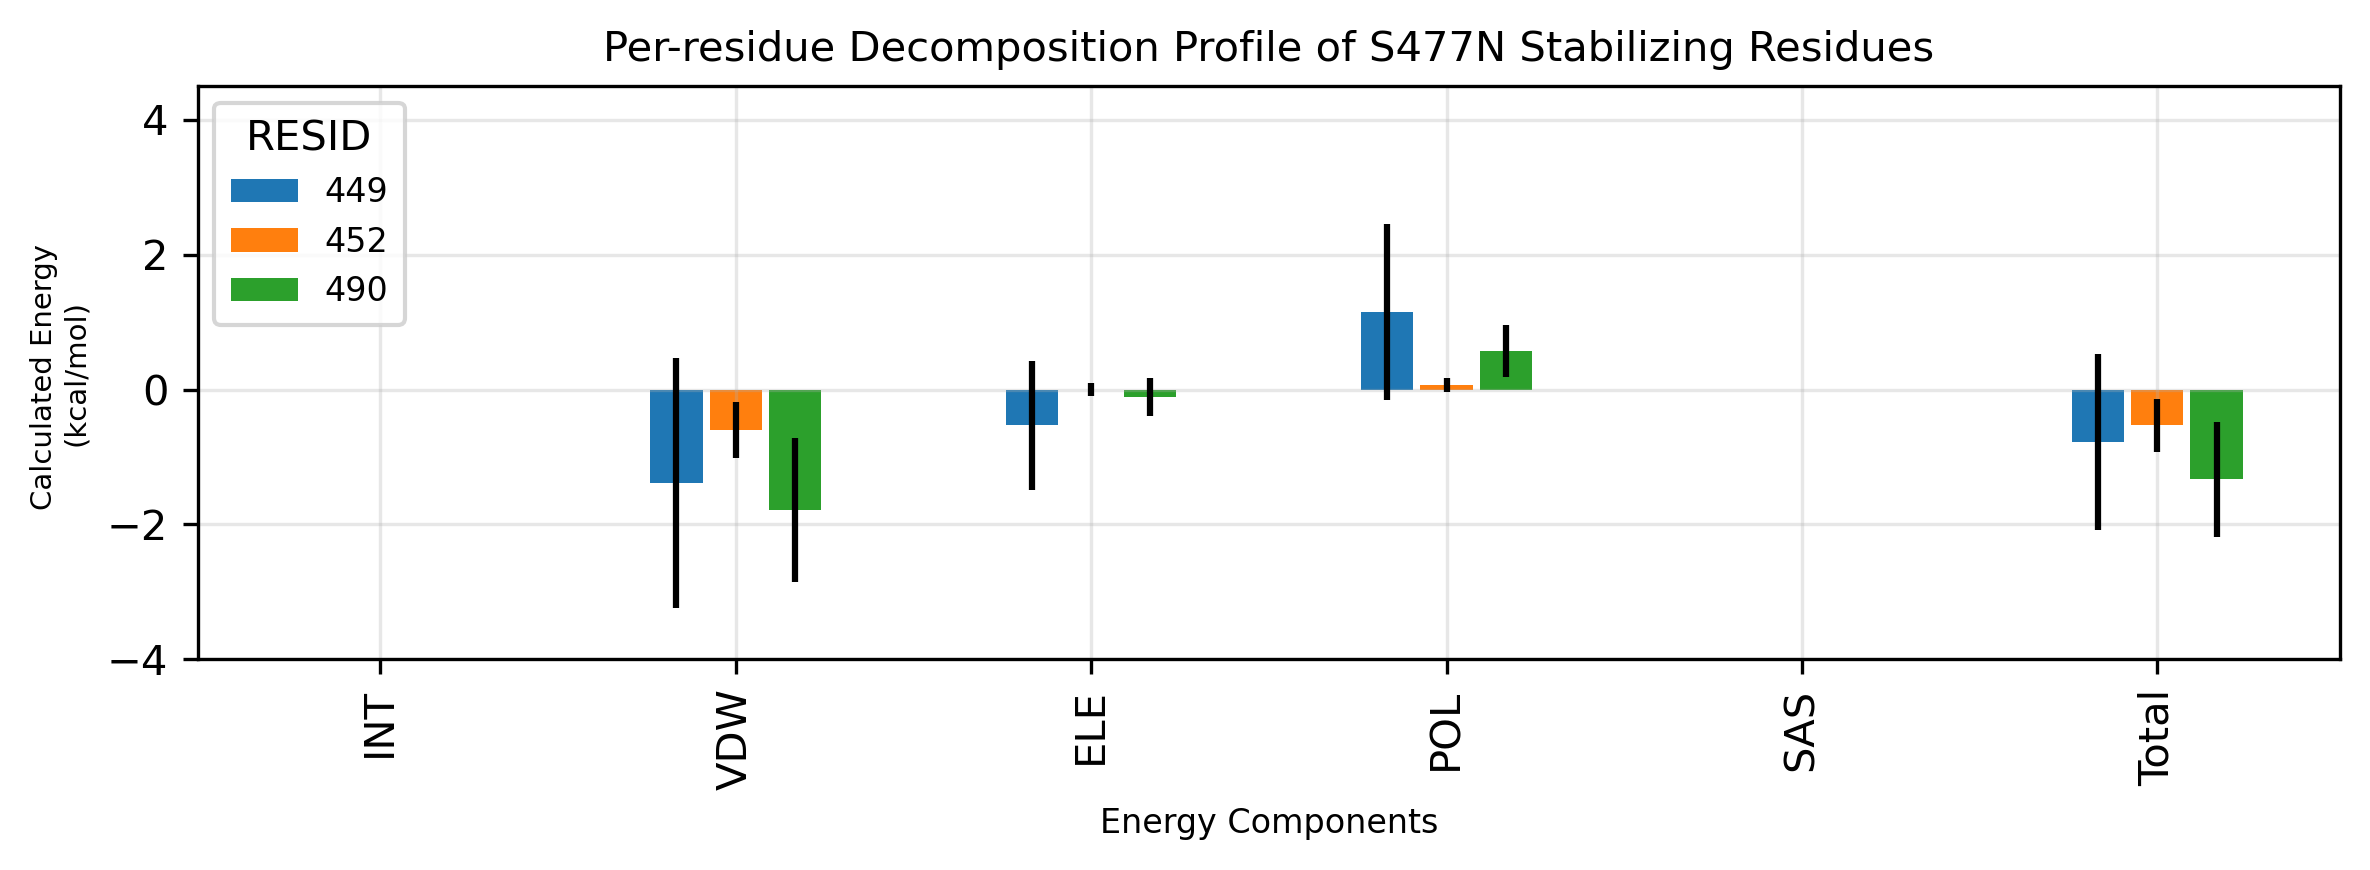

In [11]:
#Processing the S477N Decomp Plot
#load stabilizing res files
files = glob.glob(os.path.join(S477NDECOMP,"STAB","*"))
files.sort()
#init plot


fig, ax = plt.subplots(figsize=(8,3), dpi=300)



width =1 / (len(files)*2)
spacing = width * np.arange(len(files))

for decomp, n in zip(files, np.linspace(-width,width, len(files))):
    res = decomp.split("_")
    df = pd.read_csv(os.path.join(S477NDECOMP, decomp), index_col = 0)
    ax.bar(np.arange(len(df.columns)) + n, df.iloc[0], yerr=df.iloc[1], width=width-0.02, label=res[1])
    ax.set_xticks(np.arange(len(df.columns)), ['INT','VDW','ELE','POL','SAS','Total'])
    ax.tick_params(which='major',axis='x', labelrotation=90)

ax.set_title("Per-residue Decomposition Profile of S477N Stabilizing Residues", fontsize=10)
ax.set_xlabel("Energy Components", fontsize=8)
ax.set_ylabel("Calculated Energy \n(kcal/mol)", fontsize=7)
ax.set_ylim(-4,4.5)
plt.grid(alpha=0.3)
plt.legend(title='RESID', loc="upper left", fontsize=8, borderpad=0.5)
plt.tight_layout()
plt.savefig('Per-res Decomp.jpg', dpi=300)
plt.show()

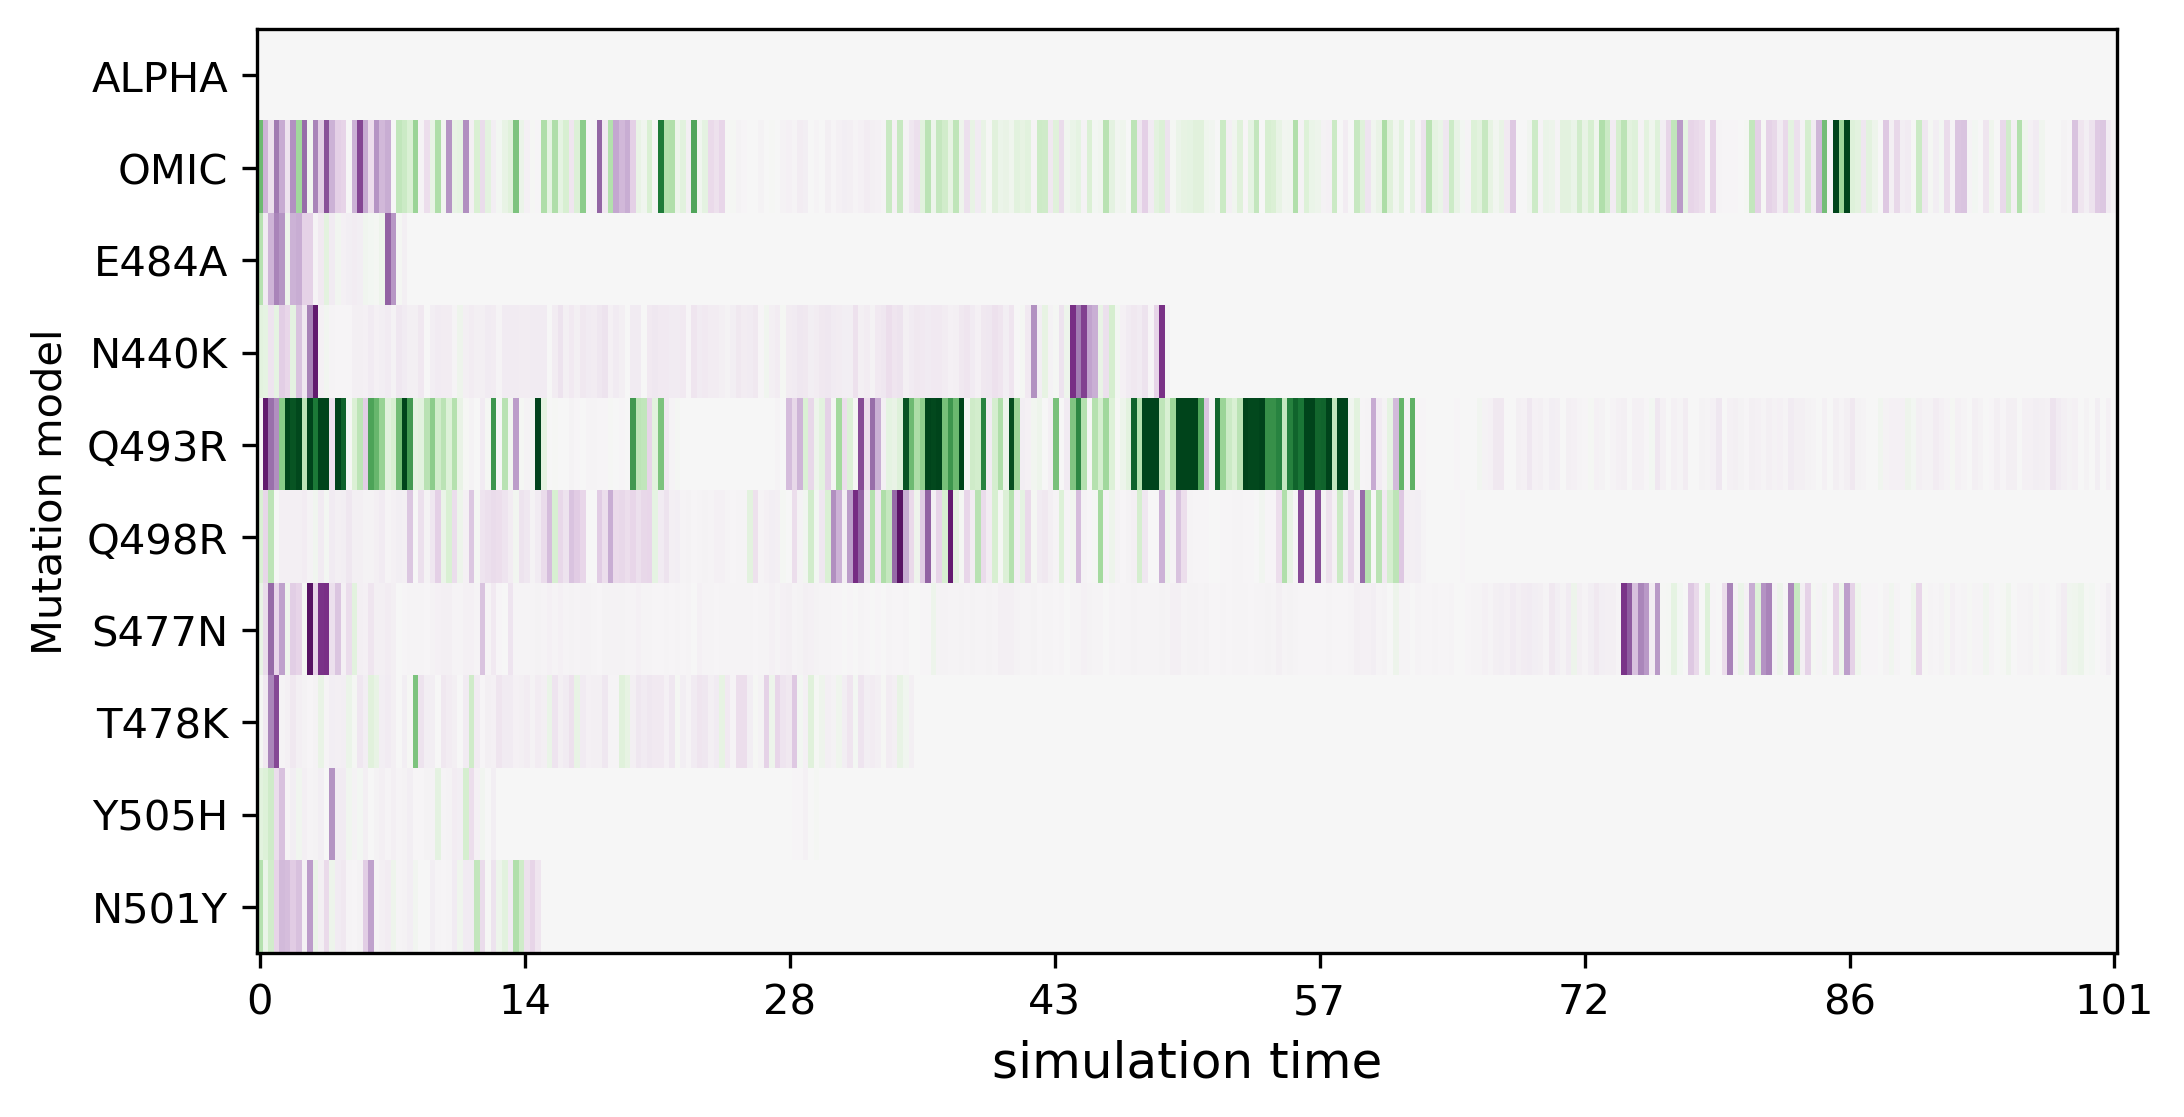

In [14]:
####Creating a comparison map
file_comp = os.listdir(Q493RCOMP)

df1 = pd.read_csv(os.path.join(Q493RCOMP,file_comp[0]), index_col=0)
df2 = df1.transpose()
fig, ax = plt.subplots(figsize=(8,4), dpi=300)
ax.imshow(df2, cmap="PRGn", vmin=-3, vmax=3, aspect='auto')
ax.set_yticks(np.arange(len(df1.columns)),df1.columns)
ax.set_xticks(np.linspace(0,333,8),np.linspace(0,101,8, dtype='int'))
ax.tick_params(which='major',axis='x')
ax.set_xlabel('simulation time', fontsize=12)
ax.set_ylabel('Mutation model')
plt.show()

ParserError: Error tokenizing data. C error: Expected 12 fields in line 3, saw 13


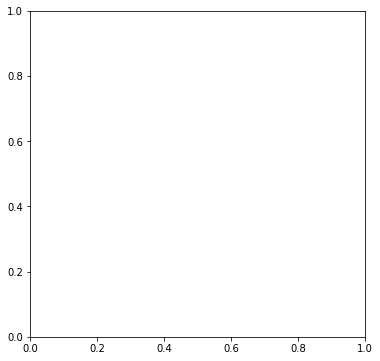

In [5]:
#Load Contacts

contacts = os.listdir(CONTACTS)

for cont in contacts:
    if "Q493R" in cont:
        fig, ax =plt.subplots(figsize=(6,6))
        df_cont = pd.read_csv(os.path.join(CONTACTS,cont))
        print(df.head())